In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/edwin/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


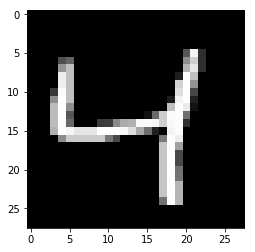

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,(None,image_size),name='inputs') 
targets_ = tf.placeholder(tf.float32,(None,image_size),name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_,encoding_dim,activation= tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded,image_size,activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits,name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_,logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt =tf.train.AdamOptimizer(0.001).minimize(cost)

In [8]:
sess=tf.Session()

In [11]:
epochs = 20
batch_size = 200

sess.run(tf.global_variables_initializer())

for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0],targets_:batch[0]}
        batch_cost,_ = sess.run([cost,opt],feed_dict=feed)
        
        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

('Epoch: 1/20...', 'Training loss: 0.6951')
('Epoch: 1/20...', 'Training loss: 0.6913')
('Epoch: 1/20...', 'Training loss: 0.6877')
('Epoch: 1/20...', 'Training loss: 0.6837')
('Epoch: 1/20...', 'Training loss: 0.6792')
('Epoch: 1/20...', 'Training loss: 0.6729')
('Epoch: 1/20...', 'Training loss: 0.6665')
('Epoch: 1/20...', 'Training loss: 0.6585')
('Epoch: 1/20...', 'Training loss: 0.6490')
('Epoch: 1/20...', 'Training loss: 0.6385')
('Epoch: 1/20...', 'Training loss: 0.6268')
('Epoch: 1/20...', 'Training loss: 0.6110')
('Epoch: 1/20...', 'Training loss: 0.6003')
('Epoch: 1/20...', 'Training loss: 0.5817')
('Epoch: 1/20...', 'Training loss: 0.5657')
('Epoch: 1/20...', 'Training loss: 0.5489')
('Epoch: 1/20...', 'Training loss: 0.5285')
('Epoch: 1/20...', 'Training loss: 0.5108')
('Epoch: 1/20...', 'Training loss: 0.4920')
('Epoch: 1/20...', 'Training loss: 0.4737')
('Epoch: 1/20...', 'Training loss: 0.4578')
('Epoch: 1/20...', 'Training loss: 0.4401')
('Epoch: 1/20...', 'Training los